## Importing neccessary libraries

In [24]:
import pandas as pd # Importing Pandas
import numpy as np # Importing Numpy
from textblob import TextBlob 

import nltk
import string
import warnings
warnings.filterwarnings('ignore')
from nltk import tokenize,WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

from string import punctuation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [25]:
# using predefined list of stopwords given by NLTK

stopwords1 = list(stopwords.words('english'))
print(stopwords1[0:11])
print('\nlength of stopwords list: ', len(stopwords1))
type(stopwords1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]

length of stopwords list:  179


list

In [26]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
stopwords1 = list(stopwords.words('english'))+list(punctuation)

In [28]:
print(len(stopwords1),stopwords1,sep='\n\n')

211

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'tha

In [29]:
data = pd.read_csv('csat.csv')

In [30]:
data.head()

,Rep_sat,Verbatim
0,10.0,Technician was great. Professional and had muc...
1,0.0,The agent with whom I had a word took only 15 ...
2,9.0,NaN
3,10.0,Nothing. I received the exact help that I nee...
4,10.0,NaN


In [33]:
print(data.isnull().sum(),data.shape,sep='\n\n')

Rep_sat     0
Verbatim    0
dtype: int64

(92574, 2)


In [34]:
data.dropna(inplace = True)

In [35]:
data=data.iloc[:1000]

In [11]:
# Creating flags as per Representative score
#  0-5 - Not Satisfied
#  6-7 - Average Satisfaction
#  7-10 - Highly Satisfied Customer

In [36]:
data['Score'] = data['Rep_sat'].apply(lambda x: 'Poor' if x<=5 else 'Average' if (x>=6 and x<=7) else 'Good')

In [37]:
data.head()

,Rep_sat,Verbatim,Score
0,10.0,Technician was great. Professional and had muc...,Good
1,0.0,The agent with whom I had a word took only 15 ...,Poor
3,10.0,Nothing. I received the exact help that I nee...,Good
5,10.0,None. Faultless,Good
6,10.0,My representative was great!,Good


In [39]:
ps=PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [81]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
#     print(list(nltk_tagged))
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

    
    lemmatized_sentence = []   
    
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
#             print('IN CASE OF NONE: ', lemmatized_sentence)
        
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
#             print('IN CASE OF ELSE : ',lemmatized_sentence)

    
    return " ".join(lemmatized_sentence)

# print(lemmatize_sentence(" i have been working on my skills ")) #I be love it



In [82]:
# Removing Stopwords and punctuatons
def clean_text(a):
    ls = [i.lower() for i in tokenize.word_tokenize(a) if i not in stopwords1]
    if len(ls)>3:
        val= ' '.join(ls)
        return val
    else :
        return None
    
# def lang_detect(i):
#     a = TextBlob(i)
#     t = a.detect_language()
#     if t != 'en':
#         return t
#     else:
#         return 'en'


# def lang_trans(i):
#     a = TextBlob(i)
#     t = a.detect_language()
#     if t != 'en':
#         return a.translate(t, 'en')
#     else:
#         return i
    
    
# Lemmatization without POS Tags
def clean_text_lemma(a):
    val= ' '.join([lemmatizer.lemmatize(i.lower(),pos = 'v') for i in tokenize.word_tokenize(a) if i not in stopwords1])
    return val

# Lemmatization with POS Tags
# def clean_text_lemma_pos(a):    
#     val= ' '.join([i.lower() for i in tokenize.word_tokenize(a) if i not in stopwords1])
#     val2 = lemmatize_sentence(val)
#     return val2

# Stemming
def clean_text_stem(a):    
    val= ' '.join([ps.stem(i.lower()) for i in tokenize.word_tokenize(a) if i not in stopwords1])
    return val

In [179]:
# from tqdm import tqdm
# tqdm.pandas()

In [83]:
data['clean_txt'] = data['Verbatim'].apply(clean_text)
data.dropna(inplace = True)
len(data)

818

In [ ]:
data.head()

In [84]:
data['clean_lemma'] = data['clean_txt'].apply(clean_text_lemma)
data['clean_lemma_pos'] = data['clean_txt'].apply(lemmatize_sentence)
data['clean_stem_txt'] = data['clean_txt'].apply(clean_text_stem)

In [85]:
data.head()

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma_pos,clean_stem_txt,clean_lemma
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,technician great professional much patience no...
1,0.0,The agent with whom I had a word took only 15 ...,Poor,the agent i word took 15 minutes conclude perm...,the agent i word take 15 minute conclude permi...,agent word took 15 minut conclud permiss relat...,agent word take 15 minutes conclude permission...
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing i received exact help i needed issue r...,nothing i receive exact help i need issue reso...,noth receiv exact help need issu resolv quickli,nothing receive exact help need issue resolve ...
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,the rep great adobe website n't place get i ne...,the rep great adobe website n't place get i ne...,rep great adob websit n't place get need rep s...,rep great adobe website n't place get need rep...
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people i spoke clueless could help,first two people i speak clueless could help,first two peopl spoke clueless could help,first two people speak clueless could help


In [90]:
data['clean_lemma_pos'].iloc[19]

'make detailed website export process adobe animate confuse unclear design straightforward product'

In [91]:
data['clean_stem_txt'].iloc[19]

'make detail websit export process adob anim confus unclear design straightforward product'

In [89]:
data['clean_lemma'].iloc[19]

'make detail website export process adobe animate confuse unclear design straightforward products'

In [92]:
data['Verbatim'].iloc[19]

'Make a more detailed website, the export process from adobe animate is very confusing and unclear. Design more straightforward products'

In [93]:
# Line by Line Execution for Data Cleaning

# data['clean_lemma_txt'] = data['Verbatim'].progress_apply(lambda x: ' '.join([lemmatizer.lemmatize(i.lower()) for i in tokenize.word_tokenize(x) if i not in stopwords1]))

# data.head()

# Calculating Sentiment Score

## Polarity Score is float which lies in the range of [-1,1] 

**It represents Whether person is happy or sad with the service**

## Subjectivity is also a float which lies in the range of [0,1]
**Subjective sentences generally refer Whether the comment is factual info or personal**


In [94]:
data['sentiment'] = data['clean_lemma_pos'].apply(lambda reveiw: TextBlob(reveiw).sentiment)

data.head()

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma_pos,clean_stem_txt,clean_lemma,sentiment
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,technician great professional much patience no...,"(0.3666666666666667, 0.35000000000000003)"
1,0.0,The agent with whom I had a word took only 15 ...,Poor,the agent i word took 15 minutes conclude perm...,the agent i word take 15 minute conclude permi...,agent word took 15 minut conclud permiss relat...,agent word take 15 minutes conclude permission...,"(0.9, 1.0)"
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing i received exact help i needed issue r...,nothing i receive exact help i need issue reso...,noth receiv exact help need issu resolv quickli,nothing receive exact help need issue resolve ...,"(0.29166666666666663, 0.375)"
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,the rep great adobe website n't place get i ne...,the rep great adobe website n't place get i ne...,rep great adob websit n't place get need rep s...,rep great adobe website n't place get need rep...,"(0.5, 0.475)"
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people i spoke clueless could help,first two people i speak clueless could help,first two peopl spoke clueless could help,first two people speak clueless could help,"(0.25, 0.3333333333333333)"


In [ ]:
'''
load the data -> word tokenize --- > remove stop words/punctuation  ---> lemmetize/ stemming/ normalization each document ---> call sentiment
'''

In [95]:
data['Polarity'] = data['sentiment'].apply(lambda x: round(x[0],2)) # Whether person is happy or sad with the service

data['Subjectivity'] = data['sentiment'].apply(lambda x: round(x[1],2)) # Whether the comment is factual info or personal
del data['sentiment']

In [98]:
data.head(5)

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma_pos,clean_stem_txt,clean_lemma,Polarity,Subjectivity
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,technician great professional much patience no...,0.37,0.35
1,0.0,The agent with whom I had a word took only 15 ...,Poor,the agent i word took 15 minutes conclude perm...,the agent i word take 15 minute conclude permi...,agent word took 15 minut conclud permiss relat...,agent word take 15 minutes conclude permission...,0.90,1.00
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing i received exact help i needed issue r...,nothing i receive exact help i need issue reso...,noth receiv exact help need issu resolv quickli,nothing receive exact help need issue resolve ...,0.29,0.38
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,the rep great adobe website n't place get i ne...,the rep great adobe website n't place get i ne...,rep great adob websit n't place get need rep s...,rep great adobe website n't place get need rep...,0.50,0.47
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people i spoke clueless could help,first two people i speak clueless could help,first two peopl spoke clueless could help,first two people speak clueless could help,0.25,0.33


In [99]:
data['Polarity_buckets'] = data['Polarity'].apply(lambda x: 'lower' if x<=0.4 else 'middle' if (x>=0.5 and x<=0.65) else 'higher')

In [100]:
data.head()

,Rep_sat,Verbatim,Score,clean_txt,clean_lemma_pos,clean_stem_txt,clean_lemma,Polarity,Subjectivity,Polarity_buckets
0,10.0,Technician was great. Professional and had muc...,Good,technician great professional much patience no...,technician great professional much patience no...,technician great profession much patienc novic...,technician great professional much patience no...,0.37,0.35,lower
1,0.0,The agent with whom I had a word took only 15 ...,Poor,the agent i word took 15 minutes conclude perm...,the agent i word take 15 minute conclude permi...,agent word took 15 minut conclud permiss relat...,agent word take 15 minutes conclude permission...,0.90,1.00,higher
3,10.0,Nothing. I received the exact help that I nee...,Good,nothing i received exact help i needed issue r...,nothing i receive exact help i need issue reso...,noth receiv exact help need issu resolv quickli,nothing receive exact help need issue resolve ...,0.29,0.38,lower
8,10.0,The Rep did great. Adobe website wasn't the p...,Good,the rep great adobe website n't place get i ne...,the rep great adobe website n't place get i ne...,rep great adob websit n't place get need rep s...,rep great adobe website n't place get need rep...,0.50,0.47,middle
9,10.0,the first two people I spoke with were CLUELES...,Good,first two people i spoke clueless could help,first two people i speak clueless could help,first two peopl spoke clueless could help,first two people speak clueless could help,0.25,0.33,lower


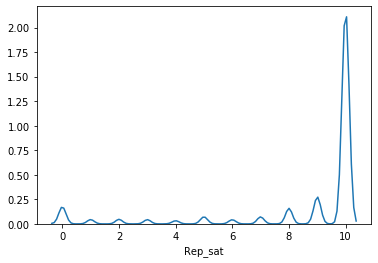

In [41]:
sns.distplot(data['Rep_sat'],hist = False)

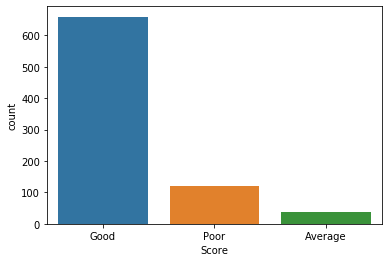

In [101]:
sns.countplot(data['Score'])


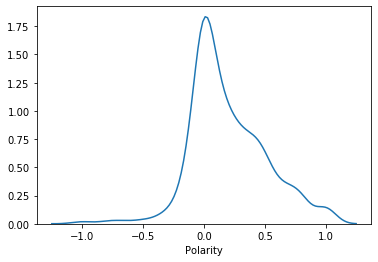

In [102]:
sns.distplot(data['Polarity'],hist = False)

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['clean_lemma_pos'],
                                                    data['Score'],
                                                    test_size = 0.2,
                                                    random_state = 37)
len(x_train)

654

In [ ]:
# 1)  Count vectorizer - give only count --> tfidf transformer ---> tf *idf

# 2)  TfidfVectorizer - tf , idf


In [105]:
tf_idf = TfidfVectorizer()

In [106]:
tf_idf.fit_transform(x_train) # output is sparse mattix


<654x2952 sparse matrix of type '<class 'numpy.float64'>'
	with 12157 stored elements in Compressed Sparse Row format>

In [107]:
tf_idf_x_train = tf_idf.fit_transform(x_train).toarray() # to have sparse matric converted in form of array
tf_idf_x_test = tf_idf.transform(x_test).toarray()

In [109]:
display( tf_idf_x_train, tf_idf_x_train.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(654, 2952)

In [111]:
max(tf_idf_x_train[0])

0.5740773738195772

In [112]:
np.argmax(tf_idf_x_train[0])

1132

In [120]:
len(tf_idf.vocabulary_)

2952

In [121]:
tf_idf.vocabulary_

{'it': 1323,
 'hard': 1132,
 'understand': 2583,
 'representative': 2067,
 'nothing': 1639,
 'screen': 2154,
 'share': 2211,
 'immensely': 1227,
 'helpful': 1157,
 'provide': 1923,
 'good': 1096,
 'service': 2199,
 'resolve': 2079,
 'issue': 1320,
 'knowledge': 1351,
 'adobe': 104,
 'support': 2371,
 'believe': 309,
 'customer': 613,
 'care': 403,
 'technician': 2419,
 'imran': 1243,
 'amaze': 164,
 'if': 1214,
 'could': 576,
 'deal': 634,
 'like': 1413,
 'thing': 2469,
 'would': 2774,
 'go': 1092,
 'smoothly': 2262,
 'very': 2663,
 'polite': 1827,
 'thank': 2453,
 'much': 1577,
 'the': 2461,
 'thorough': 2474,
 'my': 1587,
 'turn': 2556,
 'associated': 237,
 'web': 2713,
 'host': 1187,
 'company': 494,
 'remote': 2048,
 'server': 2198,
 'quot': 1965,
 '552': 48,
 'disk': 723,
 'full': 1054,
 'error': 871,
 'message': 1523,
 'year': 2786,
 'maintain': 1474,
 'website': 2715,
 'though': 2477,
 'say': 2144,
 'see': 2172,
 'side': 2228,
 'thus': 2486,
 'change': 437,
 'sometime': 2278,
 '

In [118]:
# tf_idf.get_feature_names()

In [122]:
for key, value in tf_idf.vocabulary_.items():
    if value == 2067:
        print(key)

representative


In [126]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [127]:
rf_clf = RandomForestClassifier()

rf_clf.fit(tf_idf_x_train,y_train)

rf_pred = rf_clf.predict(tf_idf_x_test)

print('Random Forest Accuracy Score:  ',np.round(accuracy_score(y_test,rf_pred)*100,0))


Random Forest Accuracy Score:   85.0


In [ ]:
# import pickle
# model_save=open('model_pickle.pkl','wb')
# pickle.dump(rf_clf,model_save)
# model_save.close()

# Creating Wordcloud

In [128]:
# Importing libraries for creating wordcloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image # The pillow library is a package that enables image reading
import urllib # This is used for opening URLs
import requests # Allows to Send requests



In [129]:
# Creating Data with their respective Part of Speechs
sentence = ' '.join(data.clean_lemma_pos[0:500].values)

blob = TextBlob(sentence)

tg = blob.tags

print(sentence,tg,sep='\n\n')

technician great professional much patience novice make feel value the agent i word take 15 minute conclude permission relate issue i repeatedly tell log admin ideally “ talla “ ’ work time nothing i receive exact help i need issue resolve quickly the rep great adobe website n't place get i need rep show go account thanks first two people i speak clueless could help i happy adobe customer care 24/7 i sure help deadline your tech service excellent i remain issue sync 2020 version i 'll address later i resolve thank i go step fix problem site it n't fix problem i spend hour try chat someone could n't get screenshare software work frustration i give the next day i reach new tech adobe they try different software screenshare time work i n't know would one way seem create confusion after 2 hour work tech could n't resolve issue i upload log file adobe could research 4 day later i reach adobe see clue creative cloud syncing i could n't ui work they answer instead want another screenshare i n

In [130]:
# Filtering Data , where specific tags like Names, Numbers etc. are not rrequired in wordcloud
t1 = []
for ind,val in enumerate(tg):
    if tg[ind][1] != 'CD' and tg[ind][1] != 'FW' and tg[ind][1] != 'NNP' and tg[ind][1] != 'PRP' and tg[ind][1] != 'DT':
        t1.append(tg[ind][0])
#         print(val)
t1 = ' '.join(t1)
t1

"technician great professional much patience novice make feel value agent i word take minute conclude permission relate issue i repeatedly tell log admin ideally talla work time nothing i receive exact help i need issue resolve quickly rep great adobe website n't place get i need rep show go account thanks first people i speak clueless could help i happy adobe customer care i sure help deadline your tech service excellent i remain issue sync version i 'll address later i resolve thank i go step fix problem site n't fix problem i spend hour try chat someone could n't get screenshare software work frustration i give next day i reach new tech adobe try different software screenshare time work i n't know would way seem create confusion after hour work tech could n't resolve issue i upload log file adobe could research day later i reach adobe see clue creative cloud syncing i could n't ui work answer instead want screenshare i n't want waste time thing by way i already follow step tech felt

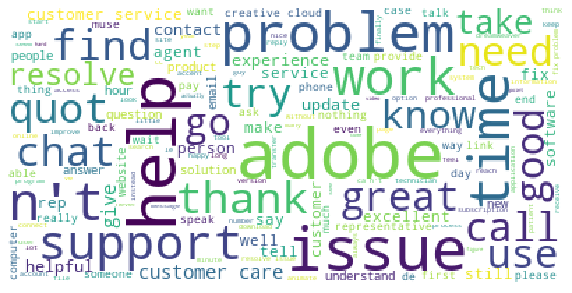

In [132]:
#Simple Word CLoud

wordcloud = WordCloud(max_font_size=50, 
                      max_words=150, 
                      background_color="white",
#                       color_func=lambda *args, **kwargs:(150,100,100),
                      stopwords= STOPWORDS).generate(t1)

plt.figure(figsize=(10,8))

plt.imshow(wordcloud) # Command to show the image
plt.axis("off") # to Turnoff the axis
plt.show()

In [ ]:
# clean data
# lemmatization and other techniques
# sentiment score
# classification model / Regression Model

In [76]:
# Example to validate the words appearing in the wordcloud
blob.word_counts['problem']

109

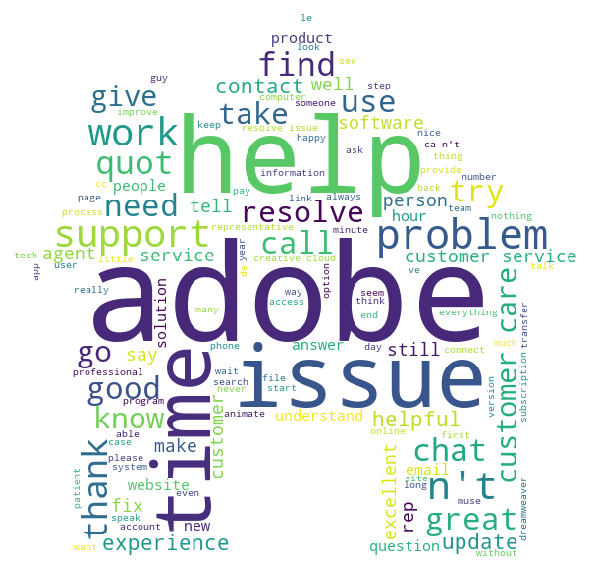

In [134]:
# Mask will change the wordcloud into any shape of your choice
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
# mask = np.array(Image.open(requests.get('https://ak.picdn.net/shutterstock/videos/208984/thumb/1.jpg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, 
                           height = 512, 
                           background_color='white', 
                           stopwords=STOPWORDS, 
                           max_words = 130,
                           mask=mask).generate(words)
    
    plt.figure(figsize=(10,8),facecolor = 'white')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

generate_wordcloud(t1, mask)